In [1]:
import statsmodels.api as sm

import sys
sys.path.append('../src')

from yf_dataset import *
from ta_features import *
from preprocessing import *

import seaborn as sns

In [2]:
ticker = 'amd'
label = 'AMD'
start_date = '2020-01-01'
close_price_period = '1d'
target_pct_change_period = 10 # n = period

In [3]:
amd_df = get_stock_data(ticker, start_date, period=close_price_period)
format_col_names(amd_df)
amd_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000
...,...,...,...,...,...,...
2023-11-16,117.199997,120.730003,116.410004,119.830002,119.830002,49661900
2023-11-17,119.639999,121.489998,118.820000,120.620003,120.620003,38508900
2023-11-20,120.699997,121.930000,120.070000,121.529999,121.529999,43138700


In [4]:
add_pct_ch_and_future(amd_df, period = 10)
amd_df

c:\Users\user\Desktop\FMLProject\FML\notebooks\../src\ta_features.py:14: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df[str(period) + 'd_close_future_pct'] = df[str(period) + 'd_future_close'].pct_change(period) #calc future % change


,Open,High,Low,Close,Adj_Close,Volume,10d_close_pct,10d_future_close,10d_close_future_pct
Date,,,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,NaN,49.770000,NaN
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,NaN,50.930000,NaN
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,NaN,51.049999,NaN
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,NaN,51.430000,NaN
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,NaN,51.709999,NaN
...,...,...,...,...,...,...,...,...,...
2023-11-16,117.199997,120.730003,116.410004,119.830002,119.830002,49661900,0.111286,NaN,0.022365
2023-11-17,119.639999,121.489998,118.820000,120.620003,120.620003,38508900,0.074566,NaN,0.015669
2023-11-20,120.699997,121.930000,120.070000,121.529999,121.529999,43138700,0.087517,NaN,0.008064


In [5]:
add_sma(amd_df, [14, 200])
add_rsi(amd_df, [14, 200])
add_ema(amd_df, [14, 200])

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', '10d_close_pct',
       '10d_future_close', '10d_close_future_pct', 'sma14', 'sma200', 'rsi14',
       'rsi200', 'ema14', 'ema200'],
      dtype='object')

In [6]:
clipped_df = amd_df[remove_features(amd_df, ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume',
       '10d_future_close'])]

In [7]:
clipped_df

,10d_close_pct,10d_close_future_pct,sma14,sma200,rsi14,rsi200,ema14,ema200
Date,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-11-16,0.111286,0.022365,112.012142,102.36045,67.642982,52.470675,113.259091,102.046739
2023-11-17,0.074566,0.015669,113.757857,102.52200,68.507988,52.553872,114.240546,102.231548
2023-11-20,0.087517,0.008064,115.402857,102.69920,69.518820,52.649826,115.212473,102.423572


<Axes: >

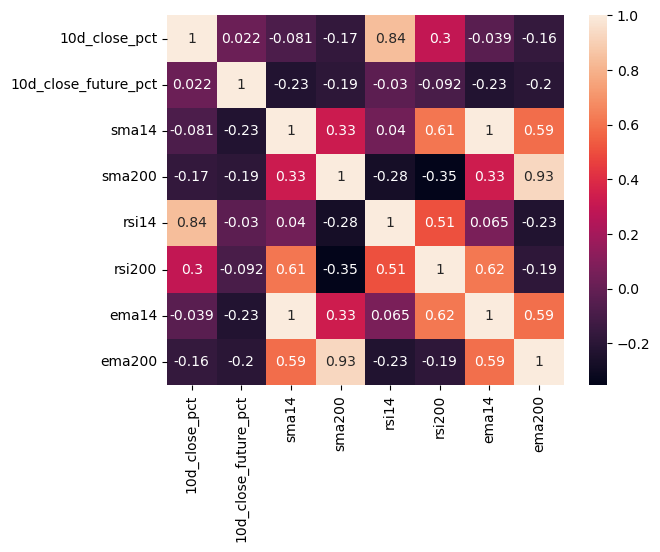

In [8]:
corr = clipped_df.corr()
sns.heatmap(corr, annot=True)

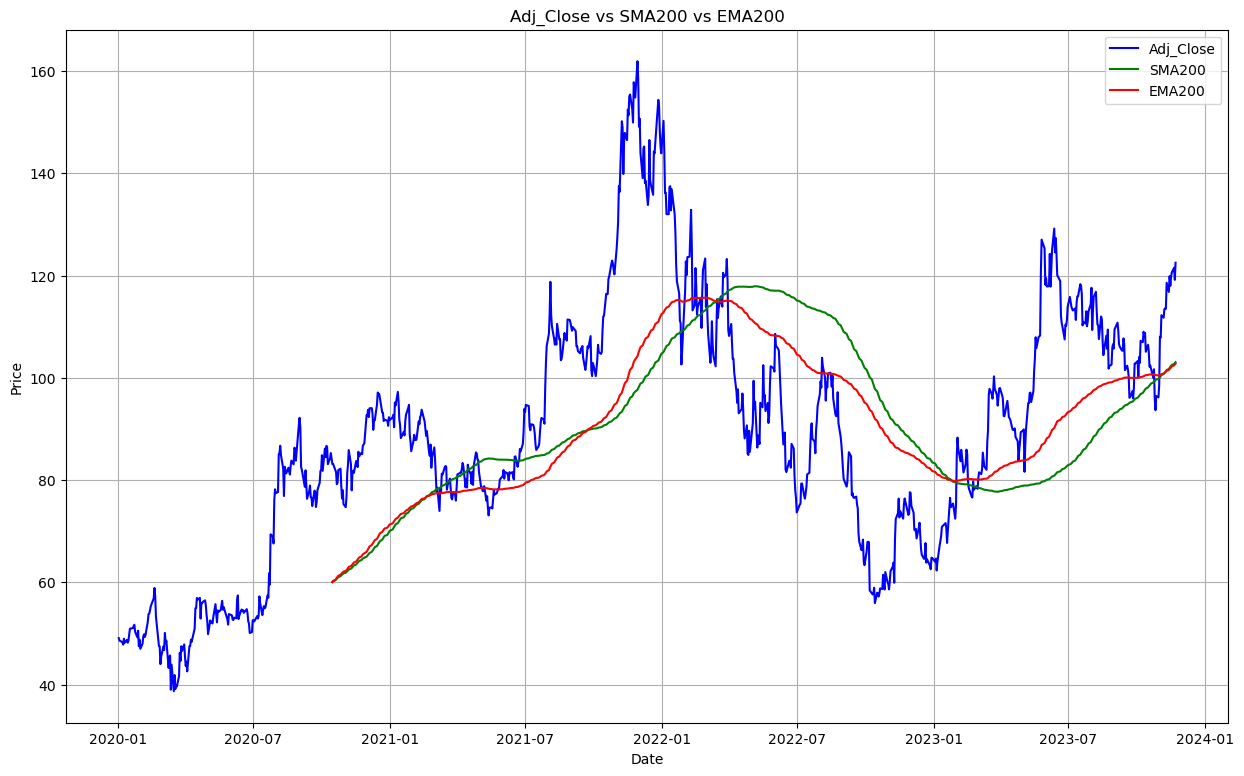

In [9]:
# Plotting
plt.figure(figsize=(15, 9))

# Plot Adj_Close
plt.plot(amd_df['Adj_Close'], label='Adj_Close', color='blue')

# Plot SMA200
plt.plot(amd_df['sma200'], label='SMA200', color='green')

# Plot EMA200
plt.plot(amd_df['ema200'], label='EMA200', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Adj_Close vs SMA200 vs EMA200')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
negative_values_count = (amd_df['10d_close_future_pct'] < 0).sum()
negative_values_count

460

In [11]:
amd_df[amd_df['10d_close_future_pct'] < 0]

,Open,High,Low,Close,Adj_Close,Volume,10d_close_pct,10d_future_close,10d_close_future_pct,sma14,sma200,rsi14,rsi200,ema14,ema200
Date,,,,,,,,,,,,,,,
2020-01-16,49.169998,50.310001,48.990002,49.770000,49.770000,58898900,0.013646,47.000000,-0.055656,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-17,50.200001,51.049999,49.900002,50.930000,50.930000,57722500,0.047942,48.020000,-0.057137,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,50.959999,51.810001,50.700001,51.049999,51.049999,49095000,0.054970,49.450001,-0.031342,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,51.630001,51.880001,51.200001,51.430000,51.430000,40772200,0.065907,49.840000,-0.030916,49.142857,NaN,NaN,NaN,49.142857,NaN
2020-01-23,51.340000,51.750000,50.740002,51.709999,51.709999,40135400,0.081121,49.320000,-0.046219,49.329285,NaN,73.787966,NaN,49.485142,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11,109.139999,110.099998,106.930000,108.309998,108.309998,51085600,0.104415,96.059998,-0.113101,102.503571,97.47065,57.936483,51.341518,104.486105,100.383958
2023-10-12,108.400002,111.309998,107.510002,108.790001,108.790001,60959400,0.058680,93.669998,-0.138983,103.402857,97.69200,58.721101,51.393188,105.059958,100.467600
2023-10-13,108.650002,108.970001,104.750000,105.089996,105.089996,52881500,0.022077,96.430000,-0.082406,103.953571,97.90110,50.847629,50.973855,105.063963,100.513594


In [12]:
amd_df

,Open,High,Low,Close,Adj_Close,Volume,10d_close_pct,10d_future_close,10d_close_future_pct,sma14,sma200,rsi14,rsi200,ema14,ema200
Date,,,,,,,,,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,NaN,49.770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,NaN,50.930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,NaN,51.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,NaN,51.430000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,NaN,51.709999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16,117.199997,120.730003,116.410004,119.830002,119.830002,49661900,0.111286,NaN,0.022365,112.012142,102.36045,67.642982,52.470675,113.259091,102.046739
2023-11-17,119.639999,121.489998,118.820000,120.620003,120.620003,38508900,0.074566,NaN,0.015669,113.757857,102.52200,68.507988,52.553872,114.240546,102.231548
2023-11-20,120.699997,121.930000,120.070000,121.529999,121.529999,43138700,0.087517,NaN,0.008064,115.402857,102.69920,69.518820,52.649826,115.212473,102.423572


In [13]:
amd_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', '10d_close_pct',
       '10d_future_close', '10d_close_future_pct', 'sma14', 'sma200', 'rsi14',
       'rsi200', 'ema14', 'ema200'],
      dtype='object')

In [14]:
amd_df.dropna(inplace=True)

In [15]:
features, target = split_features_target(amd_df, '10d_close_future_pct', ['10d_future_close','10d_close_pct'])
X = amd_df[features]
y = amd_df[target]
X = sm.add_constant(X)
X

,const,Open,High,Low,Close,Adj_Close,Volume,sma14,sma200,rsi14,rsi200,ema14,ema200
Date,,,,,,,,,,,,,
2020-10-16,1.0,83.540001,83.989998,82.410004,83.169998,83.169998,31474300,84.102143,60.21740,52.111559,55.623182,83.344025,60.277129
2020-10-19,1.0,83.620003,84.650002,81.529999,82.000000,82.000000,36689100,84.118572,60.38440,49.540085,55.328672,83.164822,60.493277
2020-10-20,1.0,82.160004,82.690002,80.580002,81.559998,81.559998,38219400,84.087857,60.55025,48.569428,55.218169,82.950845,60.702896
2020-10-21,1.0,81.720001,81.930000,79.190002,79.199997,79.199997,36426400,83.683571,60.70500,43.631438,54.630017,82.450732,60.886947
2020-10-22,1.0,79.650002,80.820000,78.419998,79.419998,79.419998,38006800,83.513571,60.86295,44.200962,54.675248,82.046634,61.071355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-02,1.0,107.959999,109.410004,105.910004,107.830002,107.830002,71377000,101.169285,100.30595,58.886107,51.237091,101.812787,100.595930
2023-11-03,1.0,109.050003,113.389999,107.860001,112.250000,112.250000,65576600,101.582857,100.52865,64.052425,51.708652,103.204416,100.711891
2023-11-06,1.0,112.599998,113.080002,110.220001,111.750000,111.750000,49270400,102.055000,100.73705,63.086680,51.651864,104.343827,100.821723


In [16]:
X_train, y_train, X_test, y_test = train_test_split(0.85, X, y)

In [17]:
X_train

,const,Open,High,Low,Close,Adj_Close,Volume,sma14,sma200,rsi14,rsi200,ema14,ema200
Date,,,,,,,,,,,,,
2020-10-16,1.0,83.540001,83.989998,82.410004,83.169998,83.169998,31474300,84.102143,60.21740,52.111559,55.623182,83.344025,60.277129
2020-10-19,1.0,83.620003,84.650002,81.529999,82.000000,82.000000,36689100,84.118572,60.38440,49.540085,55.328672,83.164822,60.493277
2020-10-20,1.0,82.160004,82.690002,80.580002,81.559998,81.559998,38219400,84.087857,60.55025,48.569428,55.218169,82.950845,60.702896
2020-10-21,1.0,81.720001,81.930000,79.190002,79.199997,79.199997,36426400,83.683571,60.70500,43.631438,54.630017,82.450732,60.886947
2020-10-22,1.0,79.650002,80.820000,78.419998,79.419998,79.419998,38006800,83.513571,60.86295,44.200962,54.675248,82.046634,61.071355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-18,1.0,103.980003,108.099998,103.930000,107.930000,107.930000,74338700,94.836429,79.26145,72.509068,52.348294,97.033004,85.244222
2023-05-19,1.0,106.360001,107.290001,104.620003,105.820000,105.820000,67830600,95.988572,79.30010,67.795790,52.098848,98.204604,85.448956
2023-05-22,1.0,104.680000,108.790001,103.489998,108.000000,108.000000,65424200,97.280714,79.32055,69.967869,52.334693,99.510656,85.673344


In [18]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     10d_close_future_pct   R-squared:                       0.181
Model:                              OLS   Adj. R-squared:                  0.167
Method:                   Least Squares   F-statistic:                     12.95
Date:                  Thu, 23 Nov 2023   Prob (F-statistic):           2.17e-22
Time:                          22:53:45   Log-Likelihood:                 623.27
No. Observations:                   655   AIC:                            -1223.
Df Residuals:                       643   BIC:                            -1169.
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8132      0.285

In [19]:
print(result.pvalues)
# Features with p <= 0.05 are typically considered significantly different from 0

const        4.481635e-03
Open         3.017090e-01
High         4.407178e-03
Low          4.863982e-02
Close        3.664155e-04
Adj_Close    3.664155e-04
Volume       6.315436e-04
sma14        4.903255e-06
sma200       5.371705e-08
rsi14        5.208511e-06
rsi200       2.755108e-03
ema14        2.079121e-05
ema200       2.083704e-06
dtype: float64


In [20]:
print(result.pvalues[result.pvalues < 0.05])

const        4.481635e-03
High         4.407178e-03
Low          4.863982e-02
Close        3.664155e-04
Adj_Close    3.664155e-04
Volume       6.315436e-04
sma14        4.903255e-06
sma200       5.371705e-08
rsi14        5.208511e-06
rsi200       2.755108e-03
ema14        2.079121e-05
ema200       2.083704e-06
dtype: float64


In [21]:
# Make predictions from our model for train and test sets
pred_train = result.predict(X_train)
pred_test = result.predict(X_test)

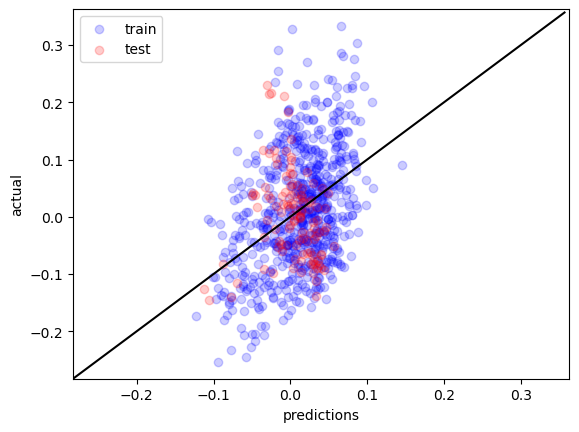

In [22]:
# Scatter the predictions vs the targets with 20% opacity
plt.scatter(pred_train, y_train, alpha=0.2, color='b', label='train')
plt.scatter(pred_test, y_test, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
perfect_line = np.arange(min(xmin, ymin), max(xmax, ymax), 0.01)
plt.plot(perfect_line, perfect_line, c='k')

# Set the same limits on x and y axes
plt.xlim([min(xmin, ymin), max(xmax, ymax)])
plt.ylim([min(xmin, ymin), max(xmax, ymax)])

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()